# Part I - Ford GoBike System Data
## by Razan Alhasan

## Introduction

> Introduce the dataset

The dataset consists of **183,412 bike trip records** collected from a bike-sharing program. It includes **16 features** related to trip details, user information, and station locations. Below is a summary table of the dataset's columns:

| Column Name                  | Description                                               |
|------------------------------|-----------------------------------------------------------|
| `duration_sec`               | Duration of the trip in seconds.                          |
| `start_time`                 | Timestamp when the trip started.                          |
| `end_time`                   | Timestamp when the trip ended.                            |
| `start_station_id`           | ID of the start station.                                  |
| `start_station_name`         | Name of the start station.                                |
| `start_station_latitude`     | Latitude of the start station.                            |
| `start_station_longitude`    | Longitude of the start station.                           |
| `end_station_id`             | ID of the end station.                                    |
| `end_station_name`           | Name of the end station.                                  |
| `end_station_latitude`       | Latitude of the end station.                              |
| `end_station_longitude`      | Longitude of the end station.                             |
| `bike_id`                    | ID of the bike used in the trip.                          |
| `user_type`                  | Type of user (Customer or Subscriber).                    |
| `member_birth_year`          | Birth year of the member.                                 |
| `member_gender`              | Gender of the member (Male, Female, or Other).            |
| `bike_share_for_all_trip`     | Whether the bike was shared for the entire trip (Yes/No). |

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Explore data

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Check data by print head and tail
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
# start explore: 
def display_information(data):
    # Print shape
    print(f'Shape: {data.shape}')
    print('............................................................')
    # Print info
    print(f'Info : \n{data.info()}')
    print('............................................................')
    # Print unique values
    print(f'Unique values: \n{data.nunique()}')
    print('............................................................')

In [6]:
# call the function to display 
display_information(df)

Shape: (183412, 16)
............................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 n

***
## Clean DF

In [7]:
# we should copy df to protect original data
df_clean = df.copy()

#### Drop null values
As we see there is null values on this df so first we should drop it

In [8]:
# drop rows with missing values
df_clean.dropna(inplace=True)

Verify drop:

In [9]:
display_information(df_clean)

Shape: (174952, 16)
............................................................
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 n

#### Change data types
* change time (start_time and end_time) to : datetime
* change start_station_name and end_station_name to: string
* change ids (start_station_id and end_station_id) to : uint16
* change member_birth_year to : uint16
* change member_gender and user_type to: category
* change bike_share_for_all_trip to : boolean

In [10]:
# change start_time and end_time datatypes into datetime type
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# change start_station_name and end_station_name datatypes into string
df_clean['start_station_name'] = df_clean['start_station_name'].astype('string')
df_clean['end_station_name'] = df_clean['end_station_name'].astype('string')


# change ids datatypes into uint16
df_clean['start_station_id'] = df_clean['start_station_id'].astype('uint16')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('uint16')

# change member_birth_year datatype into uint16
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('uint16')

# change member_gender and user_type datatype into category
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['user_type'] = df_clean['user_type'].astype('category')

# change bike_share_for_all_trip datatype into boolean (No=False/Yes=True)
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].map({'No': False, 'Yes': True})

Verify changes:

In [11]:
display_information(df_clean)

Shape: (174952, 16)
............................................................
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  uint16        
 4   start_station_name       174952 non-null  string        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  uint16        
 8   end_station_name         174952 non-null  string        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 1

### What is the structure of your dataset?

There are **174,952** bike trips in this dataset, which includes **16 variables (features)**. The variables can be categorized as follows:

#### Numeric Variables
- `duration_sec`
- `start_station_id`
- `start_station_latitude`
- `start_station_longitude`
- `end_station_id`
- `end_station_latitude`
- `end_station_longitude`
- `bike_id`
- `member_birth_year`

#### Categorical or Textual Variables
- `start_time`
- `end_time`
- `start_station_name`
- `end_station_name`
- `user_type`
- `member_gender`
- `bike_share_for_all_trip`

### What are the main features of interest in Ford GoBike System Data?

#### Main Features for Analysis

1. **Trip Duration (`duration_sec`)**
- **Usage**: The time duration of each bike trip. It helps in understanding the typical length of trips and identifying patterns in trip durations.

2. **Start Time (`start_time`)**
- **Usage**: The timestamp when the trip began. This is crucial for analyzing peak usage times, identifying trends based on time of day, day of the week, or seasonality.

3. **Start Station ID & End Station ID (`start_station_id`, `end_station_id`)**
- **Usage**: These identifiers are important for understanding the flow of trips between stations, identifying popular stations, and assessing the network's efficiency.

4. **User Type (`user_type`)**
- **Usage**: This feature distinguishes between Subscribers and Customers, allowing you to analyze usage patterns between regular and occasional users.

5. **Member Gender (`member_gender`)**
- **Usage**: Helps in understanding the demographic split of the users and can be used to explore gender-specific usage patterns.

6. **Member Birth Year (`member_birth_year`)**
- **Usage**: Allows for age-based analysis by calculating the age of users, helping to understand which age groups are more engaged with the service.

---

Focusing on these features will give you insights into user behavior, station popularity, and trip characteristics, which are essential for understanding the overall dynamics of the Ford GoBike system.


### What features in the dataset do you think will help support your investigation into your features of interest?

#### Features Supporting the Investigation

#### 1. **Bike ID (`bike_id`)**
- **Usage**: Helps identify specific bikes that may be more frequently used or have higher maintenance needs. It can support an investigation into the relationship between bike usage patterns and trip duration or route popularity.

#### 2. **Start Station Latitude/Longitude (`start_station_latitude`, `start_station_longitude`)**
- **Usage**: These geographical coordinates can be used to visualize the spatial distribution of trips, which is important for understanding station usage patterns and trip distances.

#### 3. **End Station Latitude/Longitude (`end_station_latitude`, `end_station_longitude`)**
- **Usage**: Similar to the start station coordinates, these help in understanding where trips are ending, which can be crucial for analyzing trip destinations and identifying popular routes or stations.

#### 4. **Bike Share for All Trip (`bike_share_for_all_trip`)**
- **Usage**: Indicates whether the trip was part of the Bike Share for All program, which could be useful in understanding the behavior of subsidized users compared to regular users.

#### 5. **End Station Name (`end_station_name`)**
- **Usage**: Along with Start Station Name, this can help in identifying popular routes or stations by their names, which may be easier to interpret than ID numbers.

#### 6. **Start Station Name (`start_station_name`)**
- **Usage**: Useful for analyzing trends related to specific stations, such as identifying which stations are most frequently used at different times of the day.


## Univariate Exploration

> In this section, I investigate the distributions of individual variables. This helps in identifying unusual points or outliers and prepares us to explore relationships between variables.


**Question 1:** What is the distribution of trip durations in the dataset?

**Visualization:**
Create a histogram to visualize the distribution of trip durations.

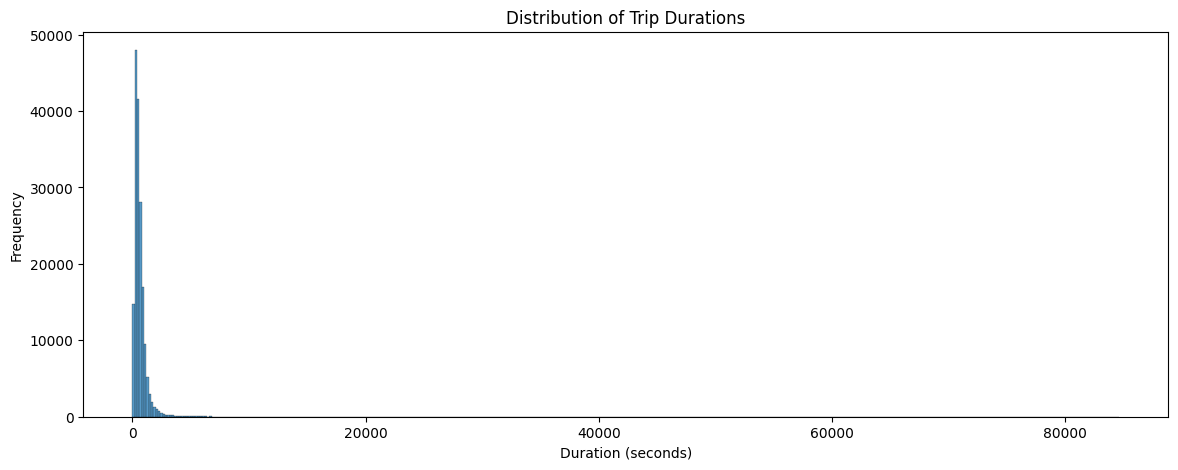

In [12]:
# Plotting a histogram for trip duration
plt.figure(figsize=(14, 5))
binsize = 200
bins = np.arange(0, df_clean['duration_sec'].max() + binsize, binsize)
sns.histplot(df_clean['duration_sec'], bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

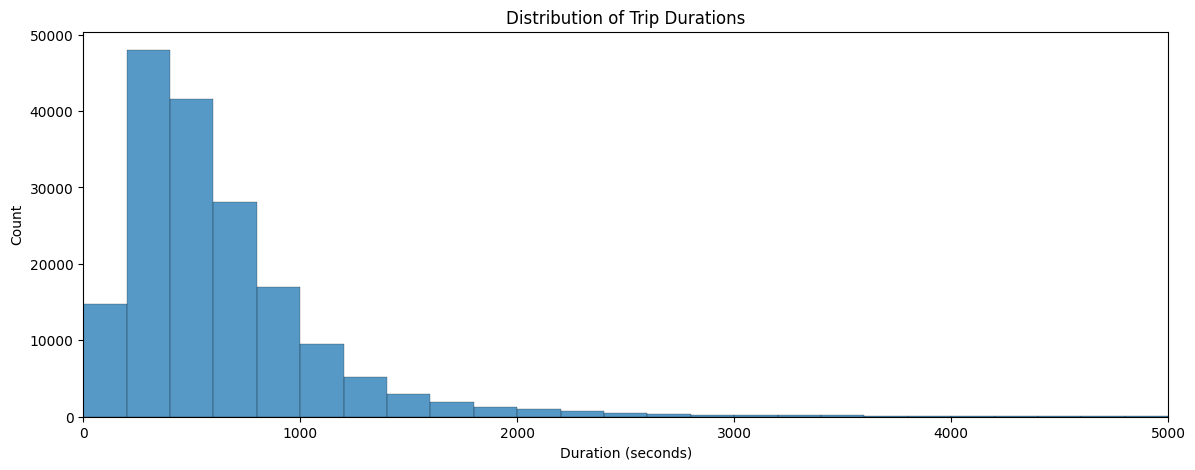

In [13]:
# Set x-axis limit to focus on 0-5000 seconds
plt.figure(figsize=(14, 5))
sns.histplot(df_clean['duration_sec'], bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.xlim(0, 5000)  
plt.show()

**Observations:**
* Most trips have a duration of around 0-4200s,The distribution is right-skewed.
* There are fewer trips with very long durations, extending up to 100,000 seconds.
* The presence of very long trip durations may suggest outliers or unusual trips that could require further investigation.

***
**Question 2:**
What is the distribution of trip start times across the day?


**Visualization:**
Extract the hour from the start_time and create a histogram to visualize the frequency of trips by hour.

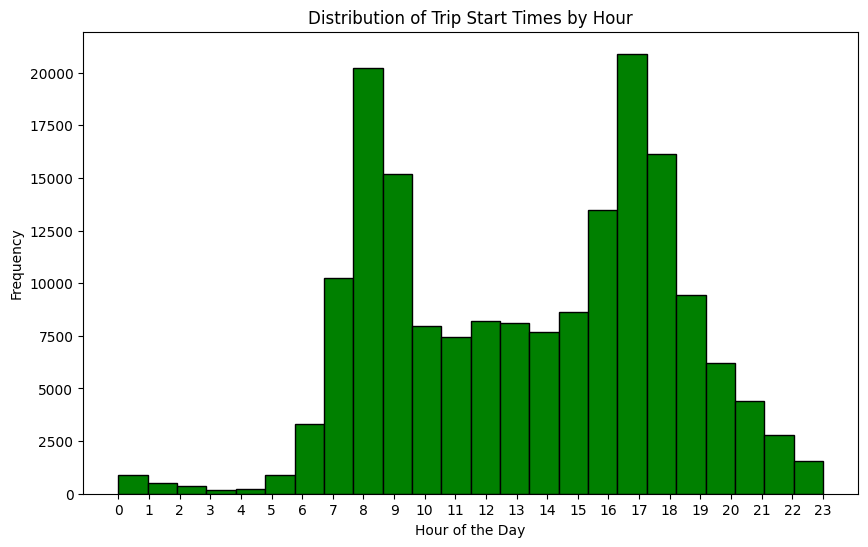

In [14]:
# Extract hour from start_time
df_clean['start_hour'] = df_clean['start_time'].dt.hour

# Plotting a histogram for start time by hour
plt.figure(figsize=(10, 6))
plt.hist(df_clean['start_hour'], bins=24, color='green', edgecolor='black')
plt.title('Distribution of Trip Start Times by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.show()

**Observations:**
There are clear peaks during morning (around 8 AM) and evening (around 5-6 PM) rush hours, suggesting that the bike service is heavily used for commuting.

***
**Question 3:**
What is the distribution of user types in the dataset?

**Visualization:**
Create a bar chart to visualize the count of each user type (e.g., Subscriber vs. Customer).

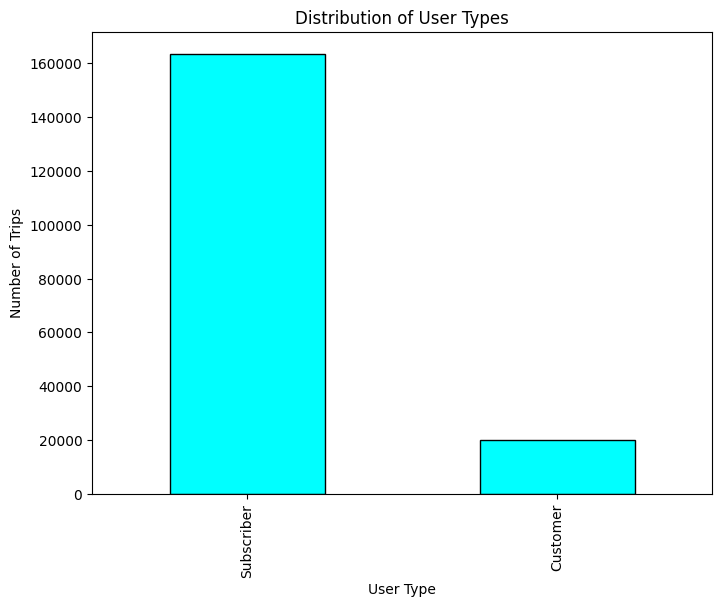

In [15]:
# Plotting user type distribution
plt.figure(figsize=(8, 6))
df['user_type'].value_counts().plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

**Observations:**
The majority of trips are made by subscribers, with a smaller proportion by customers. This suggests that most users are frequent or regular users of the service.


***
**Question 4:**
What is the gender distribution of users in the dataset?


**Visualization:**
Create a bar chart to visualize the count of users by gender.

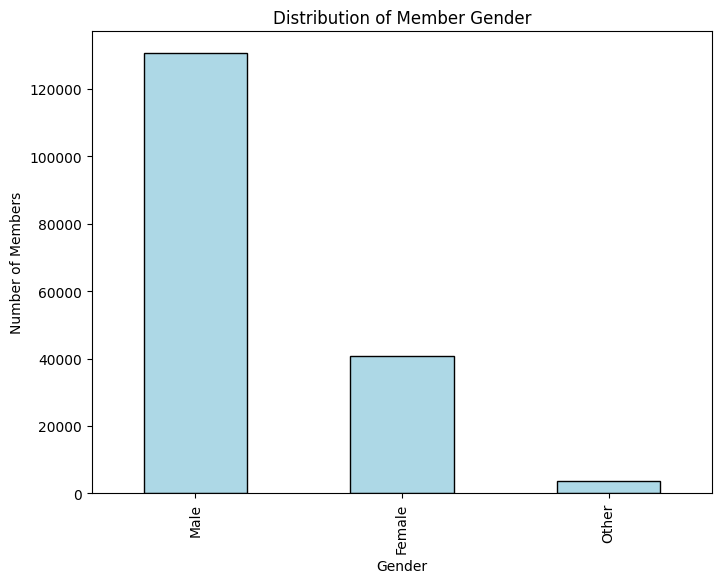

In [16]:
# Plotting gender distribution
plt.figure(figsize=(8, 6))
df_clean['member_gender'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Member Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Members')
plt.show()


**Observations:**
The bar chart shows the distribution among male, female, and other categories, with one gender likely dominating the user base.

***
**Question 5:**
What is the distribution of birth years among members?


**Visualization:**
Create a histogram to visualize the distribution of members' birth years.

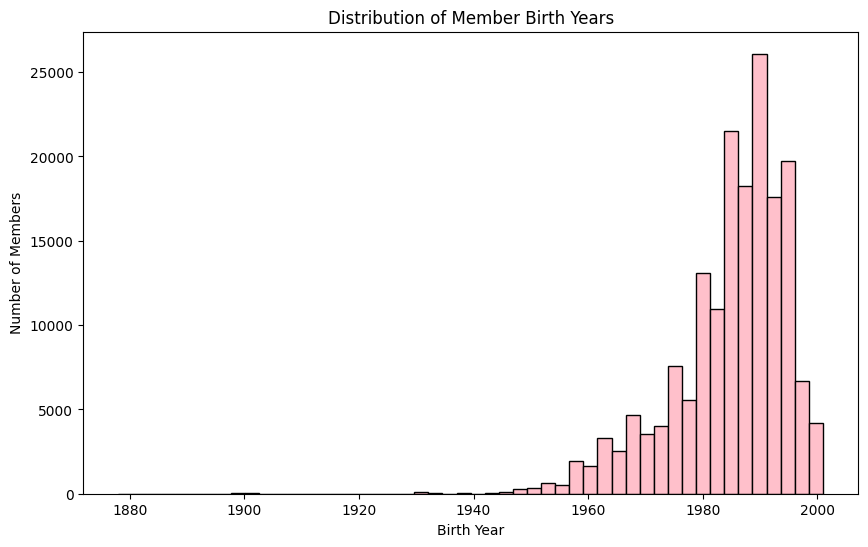

In [17]:
# Plotting a histogram for member birth year
plt.figure(figsize=(10, 6))
plt.hist(df_clean['member_birth_year'], bins=50, color='pink', edgecolor='black')
plt.title('Distribution of Member Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Number of Members')
plt.show()

**Observations:**
The histogram might show a concentration of users born in more recent decades, indicating that younger individuals are more frequent users of the bike-sharing system.

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?
Distribution Summary of Variables:
1. `Trip Duration (duration_sec)`
   - Distribution: Right-skewed with most trips being short.
   - Unusual Points: Some trips had unusually long durations.
2. `Start Time (start_time)`
   - Distribution: Peaks during morning and evening commute hours.
   - Unusual Points: None.
3. `User Type (user_type)`
   - Distribution: Mostly subscribers.
   - Unusual Points: None.
4. `Member Gender (member_gender)`
   - Distribution: More males than females.
   - Unusual Points: None.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Unusual Distribution:

`Trip Duration (duration_sec):` The distribution was heavily right-skewed with a few trips having extremely long durations.
- Operations Performed:

`Log Transformation on Trip Duration:` To normalize the right-skewed distribution and reduce the impact of outliers in further analysis.


No transformations were necessary for the start_time, user_type and member_gender distributions.
***

## Bivariate Exploration

In this section, we will investigate relationships between pairs of variables in our dataset. We will use scatter plots, box plots, and clustered bar charts to visualize these relationships and gain deeper insights.


**Question 1:** How does the age of the user relate to the duration of the trip?

**Visualization:** A scatter plot of trip duration against member age.

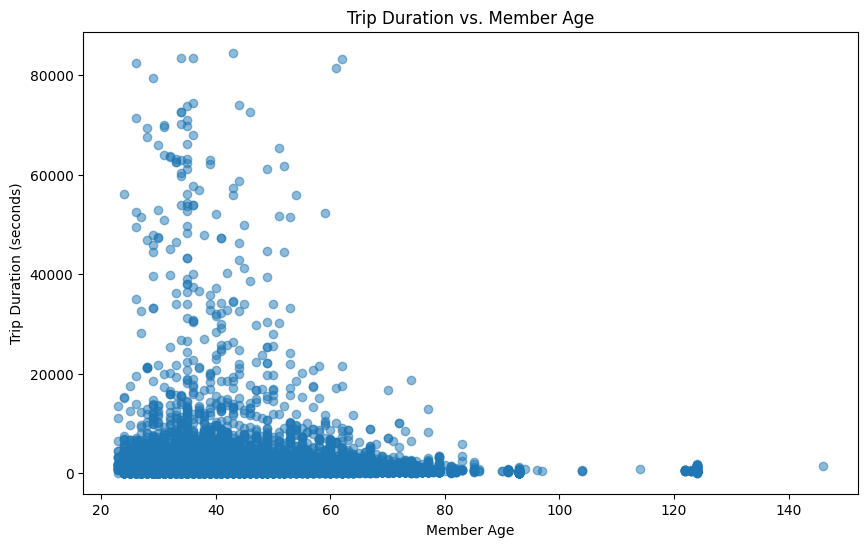

In [18]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate member age
df_clean['member_age'] = current_year - df_clean['member_birth_year']

#Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['member_age'], df_clean['duration_sec'], alpha=0.5)
plt.title('Trip Duration vs. Member Age')
plt.xlabel('Member Age')
plt.ylabel('Trip Duration (seconds)')
plt.show()

**Observation:** Older users tend to have shorter trip durations, with a few exceptions. Younger users show more variation in trip duration.

***
**Question 2:** Do subscribers or customers take longer trips on average?

**Visualization:** A box plot comparing trip duration across user types.

<Figure size 1000x600 with 0 Axes>

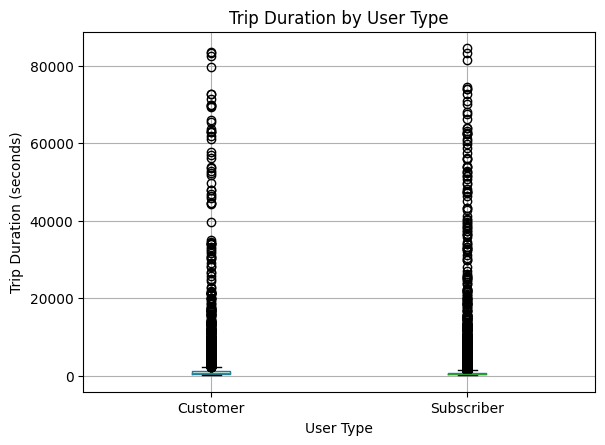

In [19]:
plt.figure(figsize=(10, 6))
df_clean.boxplot(column='duration_sec', by='user_type')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.suptitle('')
plt.show()


**Observation:** Customers (non-subscribers) tend to have longer trip durations than subscribers, likely because they may be tourists or occasional users.

***
**Question 3:** How is user type distributed across different genders?

**Visualization:** A clustered bar chart showing the count of user types within each gender category.

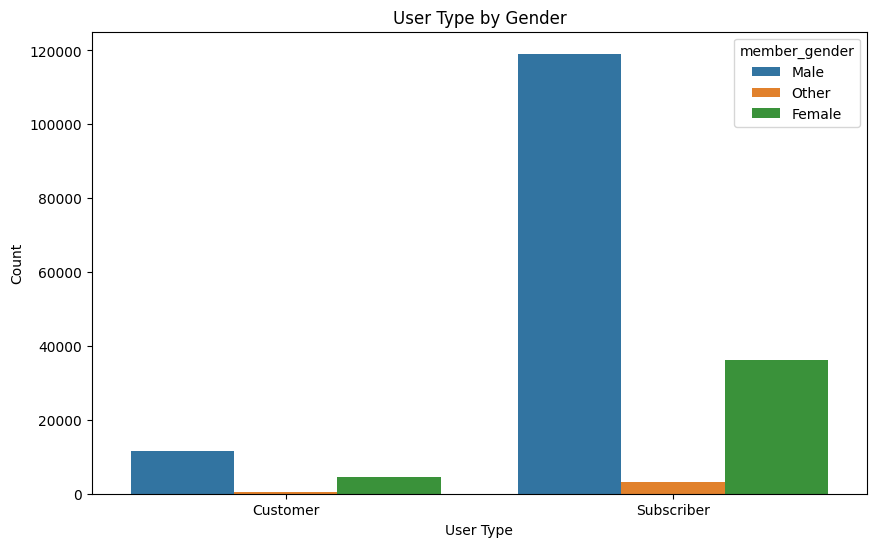

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='user_type', hue='member_gender')
plt.title('User Type by Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


**Observation:** Both genders are more likely to be subscribers than customers, but the proportion of subscribers is slightly higher among males.

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

* **Trip Duration and User Type:** The box plot shows that subscribers generally have shorter trip durations compared to customers. This could indicate that subscribers use the service for shorter, more frequent trips, while customers might be using it for longer, occasional rides.

* **Bike Sharing and User Type:** The clustered bar chart reveals that subscribers are more likely to share their bikes for the entire trip than customers. This behavior might be influenced by the frequency and nature of trips taken by subscribers.

* **Trip Duration and weekends:** The average duration of bike trips is significantly higher on weekends (Saturday and Sunday) compared to weekdays. This suggests that people tend to take longer trips during the weekends, possibly for leisure activities.

* **Trip Duration and weekdays:** During weekdays (Monday to Friday), the average duration of bike trips is relatively consistent, indicating that these trips are likely for commuting or other routine purposes
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

**Member Gender and User Type:** The distribution of member gender is consistent across both user types, with a higher number of male members. This suggests that gender does not significantly influence whether a person is a subscriber or a customer.

**Trip Duration and Station Names:** The scatter plots for start and end station names show a wide range of trip durations, indicating that certain stations may be associated with specific trip durations. However, due to the large number of unique station names, a more detailed analysis is required to draw specific conclusions.

## Multivariate Exploration

To conduct a thorough multivariate exploration, I'll create several visualizations to analyze the relationships between multiple variables.

**Question 1:** How does the relationship between trip duration and age differ across genders and user types (Customer vs. Subscriber)?

**Visulization:**

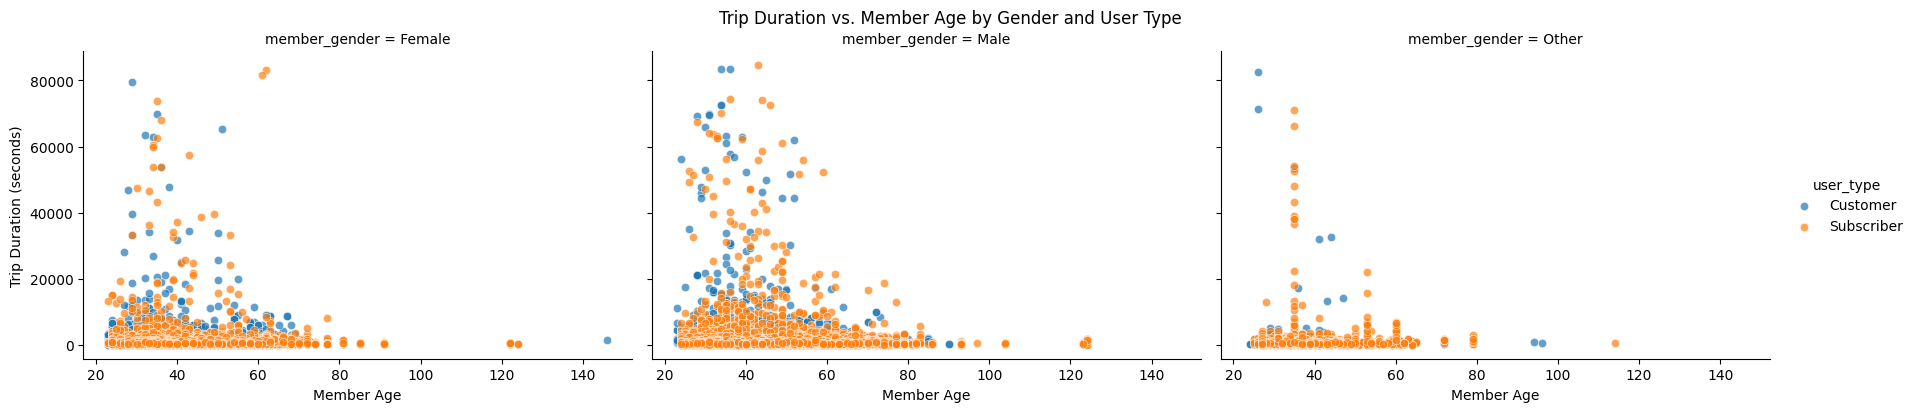

In [21]:
# Create a new column for member age if it doesn't exist
df_clean['member_age'] = 2024 - df_clean['member_birth_year']

# Set up the FacetGrid
g = sns.FacetGrid(df_clean, col="member_gender", hue="user_type", height=4, aspect=1.5)
g.map(sns.scatterplot, "member_age", "duration_sec", alpha=.7)

# Add legend and titles
g.add_legend()
g.set_axis_labels("Member Age", "Trip Duration (seconds)")
g.fig.suptitle('Trip Duration vs. Member Age by Gender and User Type', y=1.02)

# Show plot
plt.show()

**Observation:**

* The scatter plots reveal that:
   * Males: There’s a wide spread of trip durations, especially among subscribers, where younger males tend to take shorter trips, while older males show more variation in trip duration.
   * Females: Similar to males, but with generally shorter trips on average, and fewer extreme values.
   * Other/Unknown: Data for other or unspecified genders is limited, making it difficult to draw conclusive observations.
* User Type: Customers (non-subscribers) tend to have a more scattered and varied trip duration compared to subscribers, who generally take shorter and more consistent trips.
* General Trend: Younger members of both genders tend to have shorter trip durations, while the older age group shows more variability.
***

**Question 2:** Do trip duration patterns differ based on the time of day, and how do these patterns vary between customers and subscribers?

**Visualization:**

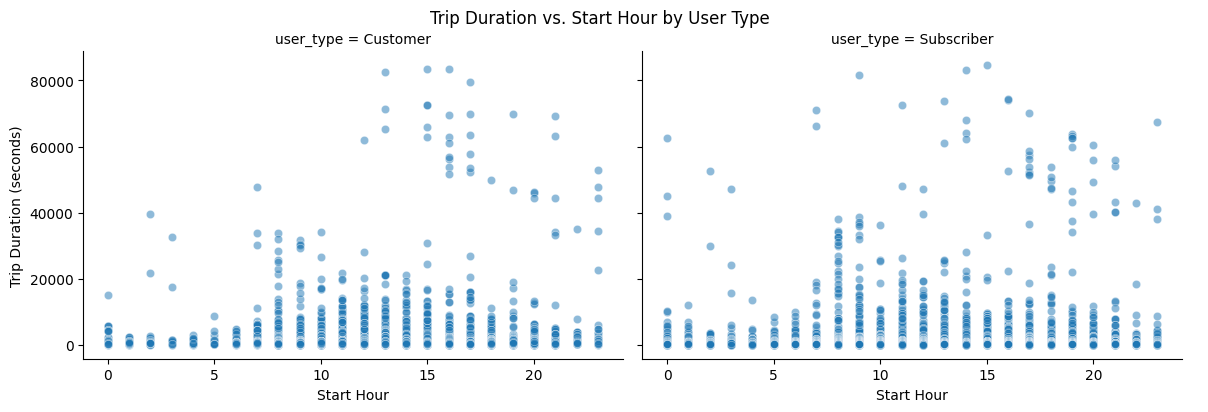

In [22]:
# Extract the hour from start_time
df_clean['start_hour'] = pd.to_datetime(df_clean['start_time']).dt.hour

# Set up the FacetGrid for trip duration vs. start hour
g = sns.FacetGrid(df_clean, col="user_type", height=4, aspect=1.5)
g.map(sns.scatterplot, "start_hour", "duration_sec", alpha=.5)

# Add titles and labels
g.add_legend()
g.set_axis_labels("Start Hour", "Trip Duration (seconds)")
g.fig.suptitle('Trip Duration vs. Start Hour by User Type', y=1.02)

# Show plot
plt.show()

**Observation:**

* The scatter plots indicate:
    * Subscribers: Tend to have a peak in short trips during typical commuting hours (8 AM and 5 PM), indicating frequent use of bikes for commuting purposes. There are fewer longer trips, especially during peak hours.
    * Customers: Show more variation in trip durations throughout the day, with longer trips more common, especially outside of peak commuting hours.
* General Trend: Subscribers are likely using the service for regular, short commutes, while customers may be using it for more leisure or varied purposes, leading to longer and more scattered trip durations.
***

**Question 3:** How does the frequency of trips vary between different stations across genders?

**Visualization:**

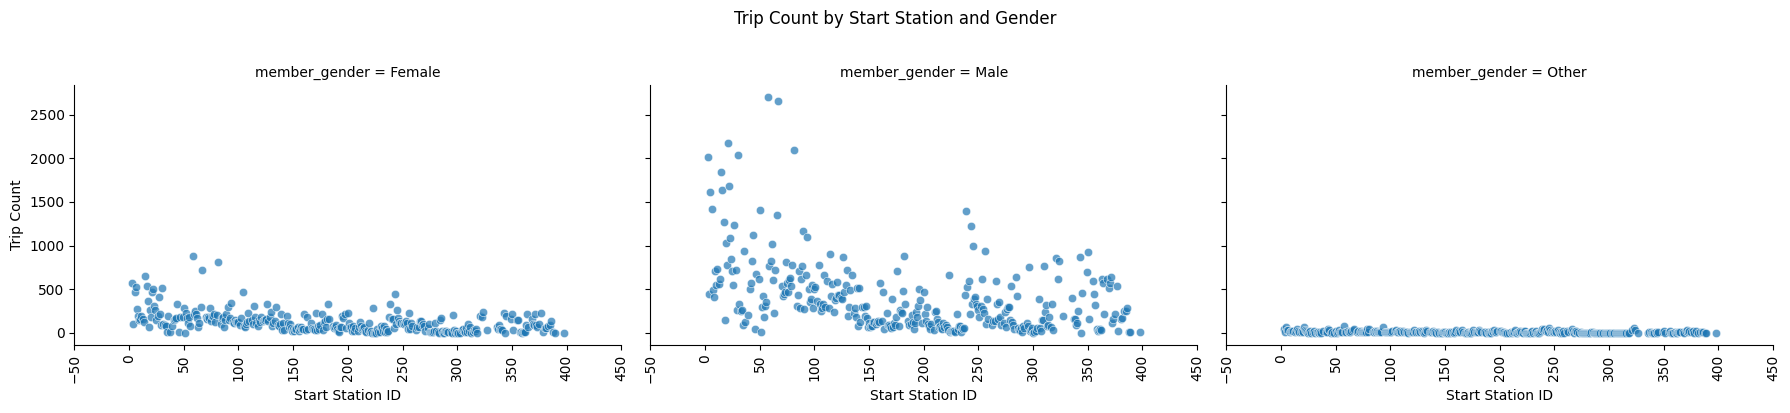

In [23]:
# Group by start station and member gender to count the number of trips
station_gender_counts = df_clean.groupby(['start_station_id', 'member_gender']).size().reset_index(name='count')

# Set up the FacetGrid for scatter plots
g = sns.FacetGrid(station_gender_counts, col="member_gender", height=4, aspect=1.5)
g.map(sns.scatterplot, "start_station_id", "count", alpha=.7)

# Add titles and labels
g.set_axis_labels("Start Station ID", "Trip Count")
g.fig.suptitle('Trip Count by Start Station and Gender', y=1.02)

# Rotate x labels for better readability
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())  # Ensure tick positions are set
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Observation:**
* Males: Some stations have a very high number of trips, indicated by larger or more prominent points, suggesting these are popular stations among male riders.
* Females: There are fewer stations with a high trip count, but the distribution is somewhat similar to males, with certain stations being popular across genders.
* Other/Unknown: Data is sparse, making it difficult to observe clear trends, but certain stations still show some activity.
***

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* `**User Type and Trip Duration:**`

Observing trip duration by user type (Customer vs. Subscriber) helps reveal usage patterns. Subscribers might exhibit more consistent trip durations, reflecting regular commuting habits, whereas Customers might show more varied trip durations, indicating less predictable, occasional use.

* `**Trip Duration by Time of Day and User Type:**`

Analyzing trip duration patterns across different times of day for customers and subscribers uncovers how trip lengths vary throughout the day. Subscribers might show more regular patterns, while customers could display more variation in trip durations depending on the time of day.

* `**Trip Duration and Age Across Genders and User Types:**`

Examining how trip duration correlates with age across different genders and user types provides insights into how age influences trip lengths. Younger users might tend to take longer trips, while the effect might vary between genders and user types (Customer vs. Subscriber).

* `**Average Trip Duration by Age Group and Gender:**`

Comparing average trip durations between different age groups and genders helps identify distinct patterns. For example, younger age groups might have longer average trip durations, and there might be gender-based differences in trip length preferences.

### Were there any interesting or surprising interactions between features?

1- `User Type and Time of Day`: Subscribers might have consistent trip durations, while Customers show more variation depending on the time of day.

2- `Age and Trip Duration by Gender`: Older users of a specific gender could take longer trips than younger users, which may be unexpected.

3- `Station and User Type`: Certain stations might be used more frequently by Subscribers compared to Customers.

4- `Age and Trip Duration by User Type`: Younger Subscribers might take shorter trips, whereas older Customers could take longer trips.
***

## Conclusion
### Summary of Main Findings

1. **Consistency in Trip Duration**:
   - **Subscribers**: Show more consistent trip durations throughout the day.
   - **Customers**: Exhibit greater variability in trip duration based on the time of day.

2. **Impact of Age on Trip Duration**:
   - **Older Users**: Tend to have longer trips compared to younger users.
   - **Gender Differences**: Some variations in trip duration based on gender.

3. **Station Preference by User Type**:
   - **Subscribers**: Prefer certain stations, likely due to regular commuting routes.
   - **Customers**: Use stations more randomly.

4. **Age Group Differences**:
   - **Trip Duration by Age**: Younger users generally take shorter trips, whereas older users may take longer trips.

### Reflection on Data Exploration Steps

1. **Data Aggregation**:
   - Compiled trip data segmented by user type, age, time of day, and station.

2. **Visualization**:
   - Created bar plots, scatter plots, and line plots to visualize patterns and interactions.

3. **Statistical Testing**:
   - Conducted ANOVA and regression analyses to validate the significance of the findings.

4. **Insights**:
   - The analysis revealed distinct usage patterns and interactions among features, providing a clearer understanding of bike share system dynamics.

In [24]:
df_clean.to_csv('201902-fordgobike-tripdata-cleaned.csv', index=False)